In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import string
import numpy as np
import re

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print("Data dimensions: ")
print("Train:  {} x {}".format(train.shape[0], train.shape[1]))
print("Test: {} x {}".format(test.shape[0], test.shape[1]))

Data dimensions: 
Train:  7613 x 5
Test: 3263 x 4


In [2]:
train.head(40)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
def get_tweets_for_class(target):
    result=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            result.append(i)
    return result


In [4]:
def count_words(tweet_words, color):
    result = pd.value_counts(np.array(tweet_words))
    top10 = result.head(10)
    plt.bar(top10.index, top10.values, color=color)

In [5]:
non_disaster = get_tweets_for_class(0)
disaster = get_tweets_for_class(1)

In [6]:
def count_punctuation(tweet_words, color):
    dic=defaultdict(int)

    special = string.punctuation
    for c in (tweet_words):
        if c in special:
            dic[c]+=1
            
    x,y=zip(*dic.items())
    plt.bar(x,y, color=color)

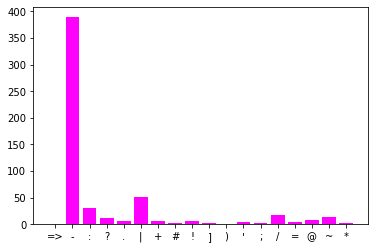

In [7]:
count_punctuation(disaster, "magenta")

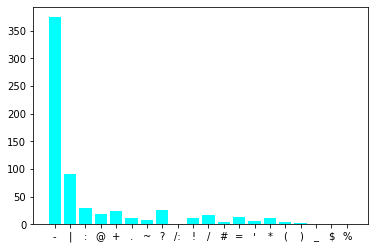

In [8]:
count_punctuation(non_disaster, "cyan")

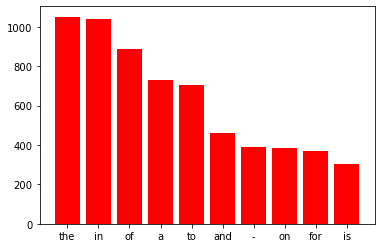

In [9]:
count_words(disaster, "red")

In [10]:
train["text"] = train["text"].apply(lambda x: re.split('https?:\/\/.*', str(x))[0])

In [11]:
train["text"] = train["text"].apply(lambda x: re.sub('[^\w\s]+', '', x))

In [12]:
train["text"] = train["text"].apply(lambda x: re.split("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", str(x))[0])

In [13]:
train.head(40)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
5,8,NaN,NaN,RockyFire Update California Hwy 20 closed in ...,1
6,10,NaN,NaN,flood disaster Heavy rain causes flash floodin...,1
7,13,NaN,NaN,Im on top of the hill and I can see a fire in ...,1
8,14,NaN,NaN,Theres an emergency evacuation happening now i...,1
9,15,NaN,NaN,Im afraid that the tornado is coming to our area,1


In [14]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('punkt')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
def create_corpus(df):
    corpus=[]
    for tweet in df['text']:
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [16]:
corpus=create_corpus(train)
corpus[:5]

[['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['all',
  'residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  'no',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected'],
 ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'],
 ['just',
  'got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school']]

In [18]:
embedding_dict={}
with open('./UM/glove.twitter.27B.200d.txt','r', encoding="utf8") as f:
    for line in f:
        words = line.split()
        word = words[0]
        vectors = np.asarray(words[1:],'float32')
        embedding_dict[word] = vectors
f.close()

In [79]:
MAX_LEN = 200
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')

In [80]:
word_index = tokenizer.word_index
print('Unique words:', len(word_index))

Unique words: 15540


In [81]:
mat_dim = len(word_index) + 1
embedding_matrix = np.zeros((mat_dim, 200))

for word, i in word_index.items():
    if i > mat_dim:
        continue
    
    emb_vec = embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec

In [82]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.056404  ,  0.49535999,  0.18438999, ...,  0.63598001,
        -0.18880001, -0.035558  ],
       [ 0.49349999,  0.35698   ,  0.66068   , ...,  0.17705999,
        -0.53694999, -0.29699001],
       ...,
       [-0.56013   ,  0.26482999,  0.47959   , ...,  0.39513999,
         0.75584   , -0.65382999],
       [ 0.13251001, -0.28165999,  0.088069  , ...,  0.72741997,
         0.86183   ,  0.046106  ],
       [ 0.47209001, -0.21304999,  0.053563  , ...,  1.10819995,
         0.21586999, -0.32132   ]])

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [84]:
vocab_size = len(word_index)+1  # Only consider the top 20k words
num_tokens_per_example = 200  # Only consider the first 200 words of each movie review
# (x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
# print(len(x_train), "Training sequences")
# print(len(x_val), "Validation sequences")
# print(x_train, y_train)
# x_train = keras.preprocessing.sequence.pad_sequences(
#     x_train, maxlen=num_tokens_per_example
# )
# x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=num_tokens_per_example)
# print(x_train, y_train)
# from sklearn.utils import shuffle
# train = shuffle(train)
# print(train)
encoded_docs = [one_hot(d, vocab_size) for d in train["text"]]
# print(encoded_docs)
# pad documents to a max length of 4 words
padseq = pad_sequences(encoded_docs, maxlen=num_tokens_per_example, padding='post')
x_train, x_val, y_train, y_val = train_test_split( tweet_pad, train["target"], test_size=0.20, random_state=42)
x_train = x_train[0:6000]
y_train = y_train[0:6000]
x_val = x_val[0:1500]
y_val = y_val[0:1500]
# print(x_train, x_val, y_train, y_val)
print(tweet_pad.shape, x_train.shape,
        y_train.shape,x_val.shape, y_val.shape)


(7613, 200) (6000, 200) (6000,) (1500, 200) (1500,)


In [105]:
embed_dim = 200  # Embedding size for each token.
num_heads = 5  # Number of attention heads
ff_dim = 50  # Hidden layer size in feedforward network.
num_experts = 8  # Number of experts used in the Switch Transformer.
batch_size = 100  # Batch size.
learning_rate = 0.0003  # Learning rate.
dropout_rate = 0.5  # Dropout rate.
num_epochs = 20  # Number of epochs.
num_tokens_per_batch = (
    batch_size * num_tokens_per_example
)  # Total number of tokens per batch.
print(f"Number of tokens per batch: {num_tokens_per_batch}")

Number of tokens per batch: 20000


In [106]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        global embedding_matrix
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                  trainable=False)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [107]:
def create_feedforward_network(ff_dim, name=None):
    return keras.Sequential(
        [layers.Dense(ff_dim, activation="relu"), layers.Dense(ff_dim, activation="relu"), layers.Dense(ff_dim, activation="relu")], name=name
    )

In [108]:
def load_balanced_loss(router_probs, expert_mask):
    # router_probs [tokens_per_batch, num_experts] is the probability assigned for
    # each expert per token. expert_mask [tokens_per_batch, num_experts] contains
    # the expert with the highest router probability in one−hot format.

    num_experts = tf.shape(expert_mask)[-1]
    
    # Get the fraction of tokens routed to each expert.
    # density is a vector of length num experts that sums to 1.
    density = tf.reduce_mean(expert_mask, axis=0)
    
    # Get fraction of probability mass assigned to each expert from the router
    # across all tokens. density_proxy is a vector of length num experts that sums to 1.
    density_proxy = tf.reduce_mean(router_probs, axis=0)
    
    # Want both vectors to have uniform allocation (1/num experts) across all
    # num_expert elements. The two vectors will be pushed towards uniform allocation
    # when the dot product is minimized.
    loss = tf.reduce_mean(density_proxy * density) * tf.cast(
        (num_experts ** 2), tf.dtypes.float32
    )
    return loss

In [109]:
class Router(layers.Layer):
    def __init__(self, num_experts, expert_capacity):
        self.num_experts = num_experts
        self.route = layers.Dense(units=num_experts)
        self.expert_capacity = expert_capacity
        super(Router, self).__init__()

    def call(self, inputs, training=False):
        
        # inputs shape: [tokens_per_batch, embed_dim]
        # router_logits shape: [tokens_per_batch, num_experts]
        router_logits = self.route(inputs)

        if training:
            # Add noise for exploration across experts.
            router_logits += tf.random.uniform(
                shape=router_logits.shape, minval=0.9, maxval=1.1
            )
            
        # Probabilities for each token of what expert it should be sent to.
        router_probs = keras.activations.softmax(router_logits, axis=-1)
        
        # Get the top−1 expert for each token. expert_gate is the top−1 probability
        # from the router for each token. expert_index is what expert each token
        # is going to be routed to.
        expert_gate, expert_index = tf.math.top_k(router_probs, k=1)
        
        # expert_mask shape: [tokens_per_batch, num_experts]
        expert_mask = tf.one_hot(expert_index, depth=self.num_experts)
        
        # Compute load balancing loss.
        aux_loss = load_balanced_loss(router_probs, expert_mask)
        self.add_loss(aux_loss)
        
        # Experts have a fixed capacity, ensure we do not exceed it. Construct
        # the batch indices, to each expert, with position in expert make sure that
        # not more that expert capacity examples can be routed to each expert.
        position_in_expert = tf.cast(
            tf.math.cumsum(expert_mask, axis=0) * expert_mask, tf.dtypes.int32
        )
        
        # Keep only tokens that fit within expert capacity.
        expert_mask *= tf.cast(
            tf.math.less(
                tf.cast(position_in_expert, tf.dtypes.int32), self.expert_capacity
            ),
            tf.dtypes.float32,
        )
        expert_mask_flat = tf.reduce_sum(expert_mask, axis=-1)
        
        # Mask out the experts that have overflowed the expert capacity.
        expert_gate *= expert_mask_flat
        
        # Combine expert outputs and scaling with router probability.
        # combine_tensor shape: [tokens_per_batch, num_experts, expert_capacity]
        combined_tensor = tf.expand_dims(
            expert_gate
            * expert_mask_flat
            * tf.squeeze(tf.one_hot(expert_index, depth=self.num_experts), 1),
            -1,
        ) * tf.squeeze(tf.one_hot(position_in_expert, depth=self.expert_capacity), 1)
        
        # Create binary dispatch_tensor [tokens_per_batch, num_experts, expert_capacity]
        # that is 1 if the token gets routed to the corresponding expert.
        dispatch_tensor = tf.cast(combined_tensor, tf.dtypes.float32)

        return dispatch_tensor, combined_tensor

In [110]:
class Switch(layers.Layer):
    def __init__(self, num_experts, embed_dim, num_tokens_per_batch, capacity_factor=1):
        self.num_experts = num_experts
        self.embed_dim = embed_dim
        self.experts = [
            create_feedforward_network(embed_dim) for _ in range(num_experts)
        ]

        self.expert_capacity = num_tokens_per_batch // self.num_experts
        self.router = Router(self.num_experts, self.expert_capacity)
        super(Switch, self).__init__()

    def call(self, inputs):
        try:
            batch_size = tf.shape(inputs)[0]
            num_tokens_per_example = tf.shape(inputs)[1]
            print(tf.shape(inputs),inputs)
            
            # inputs shape: [num_tokens_per_batch, embed_dim]
            inputs = tf.reshape(inputs, [num_tokens_per_batch, self.embed_dim])
            
            # dispatch_tensor shape: [expert_capacity, num_experts, tokens_per_batch]
            # combine_tensor shape: [tokens_per_batch, num_experts, expert_capacity]
            dispatch_tensor, combine_tensor = self.router(inputs)
            
            # expert_inputs shape: [num_experts, expert_capacity, embed_dim]
            expert_inputs = tf.einsum("ab,acd->cdb", inputs, dispatch_tensor)
            expert_inputs = tf.reshape(
                expert_inputs, [self.num_experts, self.expert_capacity, self.embed_dim]
            )
            
            # Dispatch to experts
            expert_input_list = tf.unstack(expert_inputs, axis=0)
            expert_output_list = [
                self.experts[idx](expert_input)
                for idx, expert_input in enumerate(expert_input_list)
            ]
            
            # expert_outputs shape: [expert_capacity, num_experts, embed_dim]
            expert_outputs = tf.stack(expert_output_list, axis=1)
            
            # expert_outputs_combined shape: [tokens_per_batch, embed_dim]
            expert_outputs_combined = tf.einsum(
                "abc,xba->xc", expert_outputs, combine_tensor
            )
            
            # output shape: [batch_size, num_tokens_per_example, embed_dim]
            outputs = tf.reshape(
                expert_outputs_combined,
                [batch_size, num_tokens_per_example, self.embed_dim],
            )
            return outputs
        except:
            print("My reshape")
        return []

In [111]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ffn, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        # The ffn can be either a standard feedforward network or a switch
        # layer with a Mixture of Experts.
        self.ffn = ffn
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [112]:
def create_classifier():
    switch = Switch(num_experts, embed_dim, num_tokens_per_batch)
    transformer_block = TransformerBlock(ff_dim, num_heads, switch)

    inputs = layers.Input(shape=(num_tokens_per_example,))
    embedding_layer = TokenAndPositionEmbedding(num_tokens_per_example, vocab_size, embed_dim)
    
    
    x = embedding_layer(inputs)
    x = transformer_block(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(ff_dim, activation="relu")(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    classifier = keras.Model(inputs=inputs, outputs=outputs)
    return classifier

In [113]:
classifier = create_classifier()
classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

Tensor("transformer_block_12/switch_12/Shape_2:0", shape=(3,), dtype=int32) Tensor("transformer_block_12/layer_normalization_24/batchnorm/add_1:0", shape=(None, 200, 200), dtype=float32)


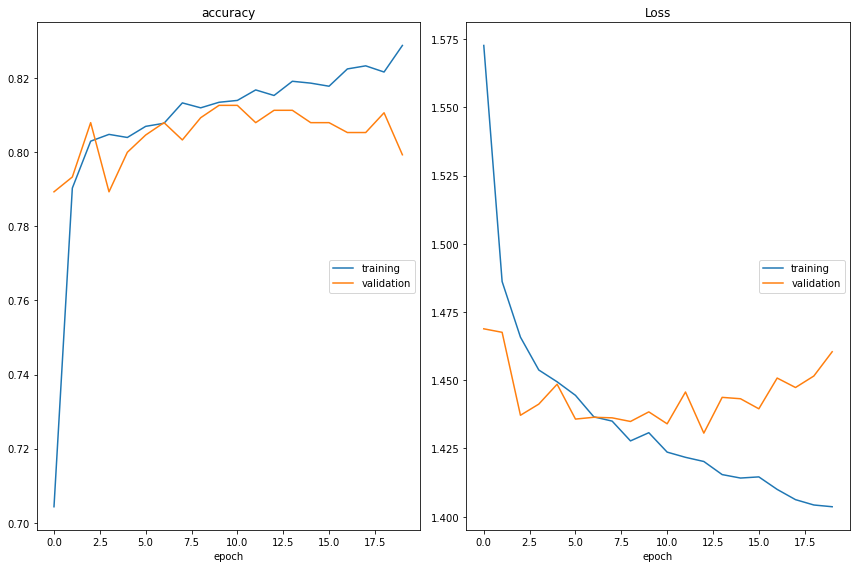

accuracy
	training         	 (min:    0.704, max:    0.829, cur:    0.829)
	validation       	 (min:    0.789, max:    0.813, cur:    0.799)
Loss
	training         	 (min:    1.404, max:    1.573, cur:    1.404)
	validation       	 (min:    1.431, max:    1.469, cur:    1.460)
60/60 [==============================] - 17s 288ms/step - loss: 1.4037 - accuracy: 0.8288 - val_loss: 1.4604 - val_accuracy: 0.7993


In [114]:
from livelossplot import PlotLossesKeras

print( x_train.shape,
        y_train.shape,x_val.shape, y_val.shape)

def run_experiment(classifier):
    history = classifier.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(x_val, y_val),
        callbacks=[PlotLossesKeras()],
    )
    return history



run_experiment(classifier)